# Tensorflow
## Softmax Sample

In [121]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from keras.datasets import mnist

import numpy as np

In [122]:
model=Sequential([
    Input(shape=(784,)),
    Dense(units=25,activation='relu'),
    Dense(units=15,activation='relu'),
    Dense(units=10,activation='linear')
])

In [123]:
path = '/kaggle/input/mnisttf/mnist.npz'
(x_train,y_train),(x_show,y_test)=mnist.load_data(path=path)

print(x_train.shape,y_train.shape)
print(x_show.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [124]:
x_train=x_train.reshape(60000,784).astype('float32')/255.0
x_test=x_show.reshape(10000,784).astype('float32')/255.0


print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [125]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [126]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3979 - accuracy: 0.8876
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2045 - accuracy: 0.9408
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1707 - accuracy: 0.9510
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1508 - accuracy: 0.9567
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1362 - accuracy: 0.9610
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1266 - accuracy: 0.9628
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1182 - accuracy: 0.9665
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1133 - accuracy: 0.9675
Epoch 9/100
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1085 - accuracy: 0.9700
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

In [127]:
model.save(r'data_model/mnist_pre.h5')

In [128]:
k=3

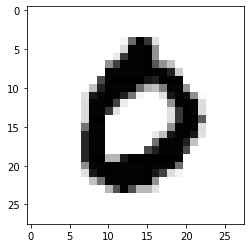

In [129]:
import matplotlib.pyplot as plt
plt.imshow(x_show[k],cmap="binary")
plt.show()

In [130]:
pre=x_test[k].reshape(1,784)
x_out=model(pre)
y_out=tf.nn.softmax(x_out)

In [131]:
print(y_out)

tf.Tensor(
[[9.9999964e-01 3.1435365e-35 1.0994121e-08 3.2864847e-16 7.6838494e-20
  3.1608746e-21 4.0194197e-19 3.0218729e-07 7.7635440e-21 1.2368195e-15]], shape=(1, 10), dtype=float32)


In [132]:
# find can replace by model.predict(pre)

n=0
tmp=0

for i in range(0,9):
    if(y_out[0][i]>n):
        tmp=i
        n=y_out[0][i]
        
print("predict:  ",tmp)
print("true:     ",y_test[k])

predict:   0
true:      0
